In [1]:
!pip install esda libpysal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 5.8 MB/s eta 0:00:00


In [2]:
import csv
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import initial categories of street features
segformer_street_feature = pd.read_csv("/content/drive/MyDrive/GEOG0105/Output/segformer_result.csv")

In [5]:
segformer_street_feature["Accessible_Surface"] = (
    segformer_street_feature["6"] +   # road
    segformer_street_feature["11"] +  # sidewalk
    segformer_street_feature["13"] +  # ground
    segformer_street_feature["52"] +  # path
    segformer_street_feature["94"]    # land/soil
)

segformer_street_feature["Obstacle"] = (
    segformer_street_feature["12"] +  # person
    segformer_street_feature["20"] +  # car
    segformer_street_feature["102"] + # van
    segformer_street_feature["127"] + # bicycle
    segformer_street_feature["43"] +  # signboard
    segformer_street_feature["93"] +  # pole
    segformer_street_feature["138"]   # trash can
)

segformer_street_feature["Greenery"] = (
    segformer_street_feature["4"] +   # tree
    segformer_street_feature["72"]    # palm tree
)

segformer_street_feature["Street_Facilities"] = (
    segformer_street_feature["69"] +   # bench
    segformer_street_feature["87"] +   # streetlight
    segformer_street_feature["136"] +  # traffic light
    segformer_street_feature["95"]     # handrail
)

segformer_street_feature["Vertical_Obstacle"] = (
    segformer_street_feature["32"] +  # fence
    segformer_street_feature["1"]     # wall
)

segformer_street_feature["Elevation_Change"] = (
    segformer_street_feature["53"] +  # stairs
    segformer_street_feature["59"] +  # staircase
    segformer_street_feature["121"] + # step/stair
    segformer_street_feature["96"] +  # escalator
    segformer_street_feature["61"]    # bridge
)

segformer_street_feature["Building"] = (
    segformer_street_feature["2"] +   # building
    segformer_street_feature["48"]    # skyscraper
)

segformer_street_feature["Overhead"] = (
    segformer_street_feature["86"] +  # awning
    segformer_street_feature["106"] + # canopy
    segformer_street_feature["114"]   # tent
)


In [6]:
output_path = "/content/drive/MyDrive/GEOG0105/segformer_street_feature_grouped.csv"
segformer_street_feature.to_csv(output_path, index=False)

# Calculate sub-indicators from segmentation

In [65]:
import pandas as pd

feature_path = "/content/drive/MyDrive/GEOG0105/segformer_street_feature_grouped.csv"
path_lsoa_var = "/content/drive/MyDrive/GEOG0105/lsoa_combined_all_variables.csv"
path_footfall = "/content/drive/MyDrive/GEOG0105/footfall_stats_filled.csv"

street_df = pd.read_csv(feature_path)
lsoa_var_df = pd.read_csv(path_lsoa_var)
footfall_df = pd.read_csv(path_footfall)

In [66]:
street_id_df = street_df.groupby("id")[
    ["Accessible_Surface", "Obstacle", "Greenery", "Street_Facilities",
     "Vertical_Obstacle", "Elevation_Change", "Building", "Overhead"]
].agg(['mean', 'std']).reset_index()


street_id_df.columns = ['id'] + [
    f"{col}_{stat}" for col, stat in street_id_df.columns[1:]
]
print(street_id_df.info())
street_id_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       3200 non-null   int64  
 1   Accessible_Surface_mean  3200 non-null   float64
 2   Accessible_Surface_std   3200 non-null   float64
 3   Obstacle_mean            3200 non-null   float64
 4   Obstacle_std             3200 non-null   float64
 5   Greenery_mean            3200 non-null   float64
 6   Greenery_std             3200 non-null   float64
 7   Street_Facilities_mean   3200 non-null   float64
 8   Street_Facilities_std    3200 non-null   float64
 9   Vertical_Obstacle_mean   3200 non-null   float64
 10  Vertical_Obstacle_std    3200 non-null   float64
 11  Elevation_Change_mean    3200 non-null   float64
 12  Elevation_Change_std     3200 non-null   float64
 13  Building_mean            3200 non-null   float64
 14  Building_std            

,id,Accessible_Surface_mean,Accessible_Surface_std,Obstacle_mean,Obstacle_std,Greenery_mean,Greenery_std,Street_Facilities_mean,Street_Facilities_std,Vertical_Obstacle_mean,Vertical_Obstacle_std,Elevation_Change_mean,Elevation_Change_std,Building_mean,Building_std,Overhead_mean,Overhead_std
0,0,0.435615,0.011074,0.008018,0.004884,0.062285,0.050526,0.001436,0.001300,0.226914,0.173779,0.000000,0.000000,0.262656,0.111117,0.000000,0.000000
1,5,0.403398,0.056554,0.046924,0.046194,0.023066,0.012996,0.000889,0.001510,0.300576,0.045122,0.000000,0.000000,0.212793,0.044721,0.000039,0.000049
2,28,0.419746,0.026484,0.003115,0.001954,0.007646,0.004228,0.000049,0.000043,0.388477,0.073841,0.000000,0.000000,0.175576,0.058003,0.000000,0.000000
3,72,0.309365,0.079540,0.004072,0.006189,0.041045,0.047516,0.000879,0.001216,0.565020,0.097886,0.000000,0.000000,0.035469,0.034136,0.000000,0.000000
4,135,0.316152,0.039315,0.103994,0.059000,0.000781,0.001370,0.000137,0.000178,0.435840,0.054974,0.000508,0.000891,0.124922,0.033414,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,36233,0.422412,0.006850,0.027061,0.015020,0.001016,0.001881,0.000439,0.000547,0.317812,0.049357,0.000000,0.000000,0.223525,0.039699,0.002842,0.002936
3196,36306,0.433799,0.020975,0.014033,0.021767,0.013867,0.010236,0.000068,0.000076,0.322510,0.037643,0.000000,0.000000,0.208682,0.027451,0.000039,0.000068
3197,36310,0.380820,0.010054,0.034082,0.021566,0.005293,0.006065,0.000010,0.000017,0.447236,0.042264,0.000049,0.000086,0.132500,0.024220,0.000000,0.000000
3198,36316,0.289355,0.045870,0.082285,0.067165,0.148682,0.117366,0.000068,0.000120,0.344648,0.201006,0.000000,0.000000,0.107568,0.052978,0.000000,0.000000


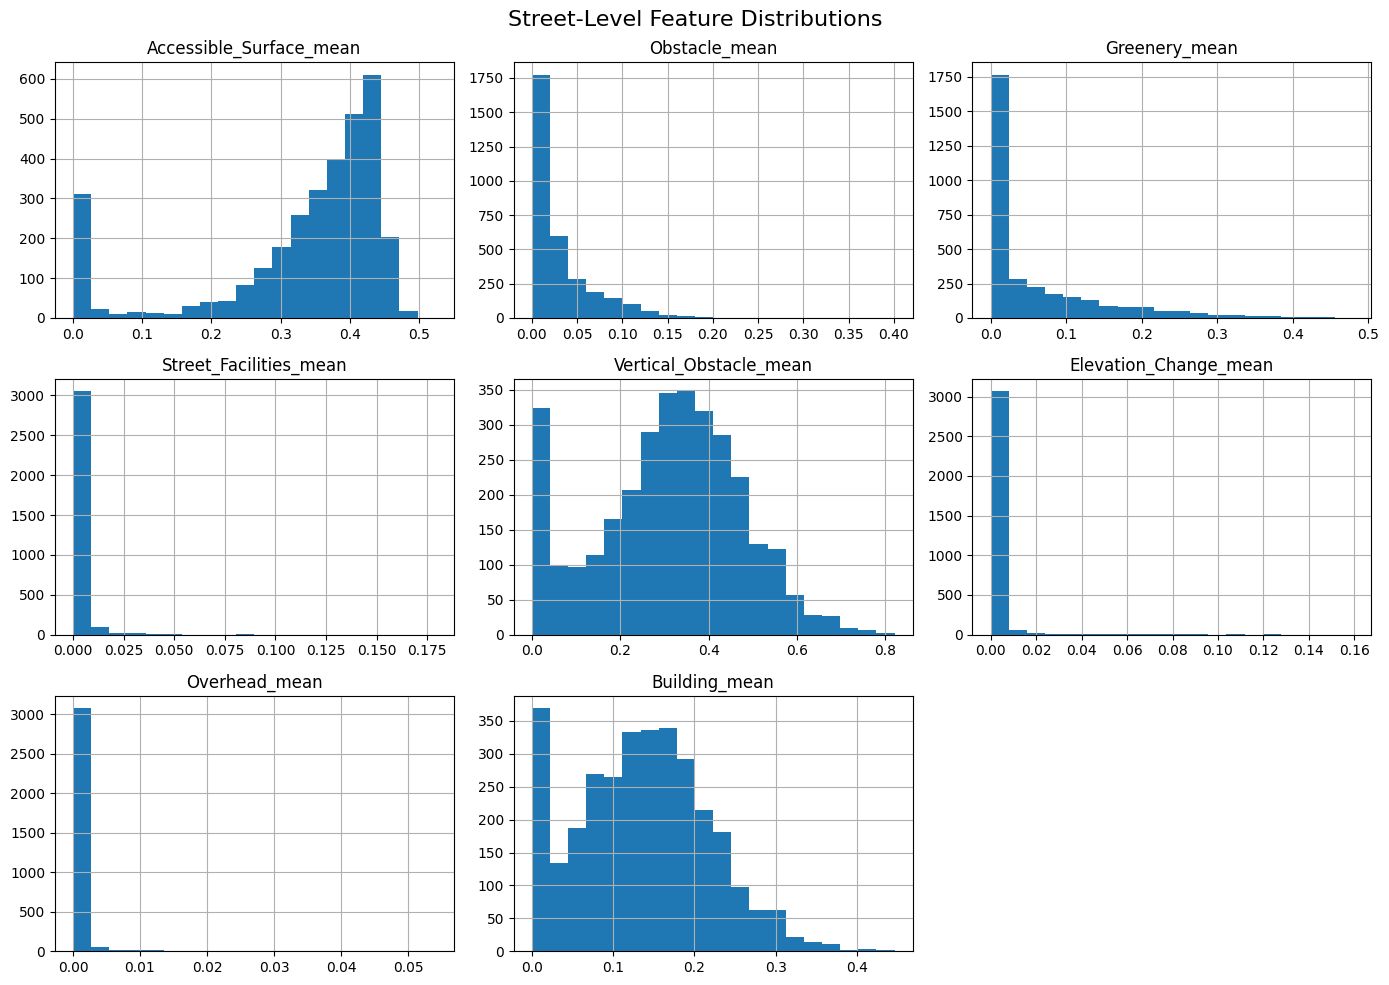

In [67]:
import matplotlib.pyplot as plt

features = [
    "Accessible_Surface_mean", "Obstacle_mean", "Greenery_mean",
    "Street_Facilities_mean", "Vertical_Obstacle_mean",
    "Elevation_Change_mean", "Overhead_mean","Building_mean"
]

street_id_df[features].hist(bins=20, figsize=(14, 10), layout=(3, 3))
plt.suptitle("Street-Level Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


In [68]:
street_id_df[features].describe()


,Accessible_Surface_mean,Obstacle_mean,Greenery_mean,Street_Facilities_mean,Vertical_Obstacle_mean,Elevation_Change_mean,Overhead_mean,Building_mean
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,0.331421,0.030856,0.058924,0.001986,0.307747,0.001769,0.000403,0.135357
std,0.131359,0.036719,0.085821,0.006650,0.165945,0.009804,0.002390,0.082171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.303354,0.006465,0.000205,0.000010,0.205703,0.000000,0.000000,0.076804
50%,0.376670,0.017029,0.014961,0.000352,0.324106,0.000000,0.000000,0.136318
75%,0.420447,0.041907,0.090029,0.001523,0.422566,0.000010,0.000000,0.190078
max,0.524072,0.400732,0.480195,0.179121,0.820723,0.159520,0.054121,0.446240


In [69]:
# Accessible_Surface_score: positive
street_id_df["Accessible_Surface_score"] = pd.qcut(
    street_id_df["Accessible_Surface_mean"],
    q=5, labels=[1, 2, 3, 4, 5], duplicates="drop"
).astype(int)

In [70]:
street_id_df["Obstacle_combo"] = (
    street_id_df["Obstacle_mean"] +
    street_id_df["Vertical_Obstacle_mean"] +
    street_id_df["Elevation_Change_mean"] +
    street_id_df["Overhead_mean"]
)

street_id_df["Obstacle_score"] = pd.qcut(
    street_id_df["Obstacle_combo"],
    q=5, labels=[5, 4, 3, 2, 1], duplicates="drop"  # negative
).astype(int)

In [71]:
street_id_df["Enclosure_combo"] = (street_id_df["Building_mean"] + street_id_df["Greenery_mean"] +street_id_df["Street_Facilities_mean"])/3

street_id_df["Enclosure_score"] = pd.qcut(
    street_id_df["Enclosure_combo"],
    q=5, labels=[1, 2, 3, 4, 5], duplicates="drop"
).astype(int)

In [72]:
street_id_df.info()
street_id_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        3200 non-null   int64  
 1   Accessible_Surface_mean   3200 non-null   float64
 2   Accessible_Surface_std    3200 non-null   float64
 3   Obstacle_mean             3200 non-null   float64
 4   Obstacle_std              3200 non-null   float64
 5   Greenery_mean             3200 non-null   float64
 6   Greenery_std              3200 non-null   float64
 7   Street_Facilities_mean    3200 non-null   float64
 8   Street_Facilities_std     3200 non-null   float64
 9   Vertical_Obstacle_mean    3200 non-null   float64
 10  Vertical_Obstacle_std     3200 non-null   float64
 11  Elevation_Change_mean     3200 non-null   float64
 12  Elevation_Change_std      3200 non-null   float64
 13  Building_mean             3200 non-null   float64
 14  Building

,id,Accessible_Surface_mean,Accessible_Surface_std,Obstacle_mean,Obstacle_std,Greenery_mean,Greenery_std,Street_Facilities_mean,Street_Facilities_std,Vertical_Obstacle_mean,...,Elevation_Change_std,Building_mean,Building_std,Overhead_mean,Overhead_std,Accessible_Surface_score,Obstacle_combo,Obstacle_score,Enclosure_combo,Enclosure_score
0,0,0.435615,0.011074,0.008018,0.004884,0.062285,0.050526,0.001436,0.001300,0.226914,...,0.000000,0.262656,0.111117,0.000000,0.000000,5,0.234932,4,0.108792,5
1,5,0.403398,0.056554,0.046924,0.046194,0.023066,0.012996,0.000889,0.001510,0.300576,...,0.000000,0.212793,0.044721,0.000039,0.000049,4,0.347539,3,0.078916,4
2,28,0.419746,0.026484,0.003115,0.001954,0.007646,0.004228,0.000049,0.000043,0.388477,...,0.000000,0.175576,0.058003,0.000000,0.000000,4,0.391592,3,0.061090,3
3,72,0.309365,0.079540,0.004072,0.006189,0.041045,0.047516,0.000879,0.001216,0.565020,...,0.000000,0.035469,0.034136,0.000000,0.000000,2,0.569092,1,0.025798,1
4,135,0.316152,0.039315,0.103994,0.059000,0.000781,0.001370,0.000137,0.000178,0.435840,...,0.000891,0.124922,0.033414,0.000000,0.000000,2,0.540342,1,0.041947,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,36233,0.422412,0.006850,0.027061,0.015020,0.001016,0.001881,0.000439,0.000547,0.317812,...,0.000000,0.223525,0.039699,0.002842,0.002936,4,0.347715,3,0.074993,3
3196,36306,0.433799,0.020975,0.014033,0.021767,0.013867,0.010236,0.000068,0.000076,0.322510,...,0.000000,0.208682,0.027451,0.000039,0.000068,5,0.336582,3,0.074206,3
3197,36310,0.380820,0.010054,0.034082,0.021566,0.005293,0.006065,0.000010,0.000017,0.447236,...,0.000086,0.132500,0.024220,0.000000,0.000000,3,0.481367,2,0.045934,2
3198,36316,0.289355,0.045870,0.082285,0.067165,0.148682,0.117366,0.000068,0.000120,0.344648,...,0.000000,0.107568,0.052978,0.000000,0.000000,2,0.426934,2,0.085439,4


In [84]:
id_lsoa_map = street_df[["id", "lsoa21cd"]].drop_duplicates()
street_id_df = street_id_df.merge(id_lsoa_map, on="id", how="left")


MergeError: Passing 'suffixes' which cause duplicate columns {'lsoa21cd_x'} is not allowed.

In [87]:
lsoa_semantic_scores = (
    street_id_df.groupby("lsoa21cd")[
        ["Accessible_Surface_score", "Obstacle_score", "Enclosure_score"]
    ]
    .mean()
    .reset_index()
)

In [88]:
lsoa_semantic_scores.to_csv("lsoa_semantic_score.csv", index=False)

In [94]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

lsoa_shp = "/content/drive/MyDrive/GEOG0105/Research_Area/research_area.shp"
lsoa_gdf = gpd.read_file(lsoa_shp).to_crs("EPSG:4326")

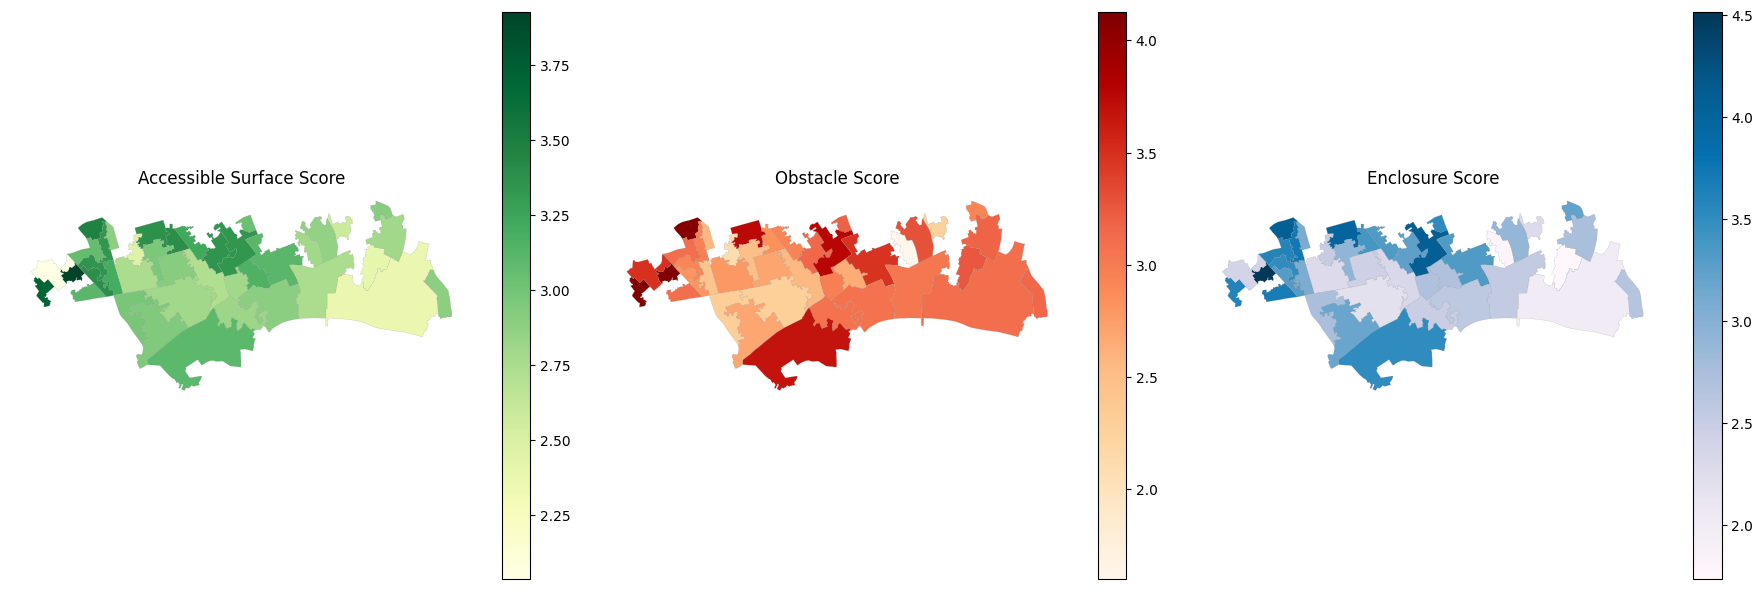

In [95]:
import geopandas as gpd
import matplotlib.pyplot as plt


lsoa_semantic_gdf = lsoa_gdf.merge(
    lsoa_semantic_scores, on="lsoa21cd", how="left"
)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

lsoa_semantic_gdf.plot(
    column="Accessible_Surface_score", cmap="YlGn", linewidth=0.1,
    ax=axes[0], edgecolor="gray", legend=True
)
axes[0].set_title("Accessible Surface Score")
axes[0].axis("off")

lsoa_semantic_gdf.plot(
    column="Obstacle_score", cmap="OrRd", linewidth=0.1,
    ax=axes[1], edgecolor="gray", legend=True
)
axes[1].set_title("Obstacle Score")
axes[1].axis("off")

lsoa_semantic_gdf.plot(
    column="Enclosure_score", cmap="PuBu", linewidth=0.1,
    ax=axes[2], edgecolor="gray", legend=True
)
axes[2].set_title("Enclosure Score")
axes[2].axis("off")

plt.tight_layout()
plt.show()


# Calculate WAI (Wheelchair-users Accessibility Index)

In [93]:
lsoa_all = lsoa_var_df.merge(
    lsoa_semantic_scores, on="lsoa21cd", how="left"
)

lsoa_all = lsoa_all.merge(
    footfall_df, on="lsoa21cd", how="left"
)
lsoa_all.info()
lsoa_all

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lsoa21cd                  40 non-null     object 
 1   area_km2                  40 non-null     float64
 2   station_count             40 non-null     float64
 3   station_density           40 non-null     float64
 4   accessibility_coverage    40 non-null     float64
 5   length_km                 40 non-null     float64
 6   footway_density           40 non-null     float64
 7   Accessible_Surface_score  40 non-null     float64
 8   Obstacle_score            40 non-null     float64
 9   Enclosure_score           40 non-null     float64
 10  mean_footfall             40 non-null     float64
 11  std_footfall              40 non-null     float64
 12  cv_footfall               40 non-null     float64
dtypes: float64(12), object(1)
memory usage: 4.2+ KB


,lsoa21cd,area_km2,station_count,station_density,accessibility_coverage,length_km,footway_density,Accessible_Surface_score,Obstacle_score,Enclosure_score,mean_footfall,std_footfall,cv_footfall
0,E01000853,0.058568,0.0,0.000000,1.000000,2.842895,48.539987,3.0375,3.2000,3.5250,40.937398,38.239869,0.934106
1,E01000919,0.152825,9.0,58.890963,1.000000,11.287188,73.857041,2.8000,2.9750,2.7125,24.701669,30.343983,1.228418
2,E01000916,0.147250,6.0,40.746936,1.000000,0.257528,1.748912,2.8000,1.6000,1.8000,68.493552,95.565878,1.395254
3,E01000918,0.168256,8.0,47.546538,0.999069,9.800552,58.247791,3.1625,2.6500,2.7125,60.452517,65.264852,1.079605
4,E01000851,0.133424,3.0,22.484688,1.000000,8.209998,61.533083,3.2250,2.9375,3.3250,51.384183,52.533929,1.024937
5,E01000850,0.195157,2.0,10.248133,1.000000,10.654691,54.595346,3.3500,3.1625,3.2500,43.893477,45.759440,1.042511
6,E01000855,0.320524,14.0,43.678510,1.000000,14.853024,46.339853,3.3375,3.7625,4.0875,67.391808,69.060294,1.024758
7,E01000914,0.448043,24.0,53.566276,0.992803,15.183620,33.888750,3.1125,3.4750,3.3250,80.940995,80.367183,0.992911
8,E01000005,0.189578,14.0,73.848344,0.803280,4.579861,24.158223,2.8875,3.1625,2.6500,15.384582,21.836774,1.419393
9,E01000002,0.228420,6.0,26.267427,1.000000,10.319490,45.177744,2.4000,3.2500,1.7375,20.393136,29.994286,1.470803


In [100]:
def assign_score(series, direction="positive"):
    if direction in ["positive", "negative"]:
        reverse = (direction == "negative")
        ranked = series.rank(method='min', ascending=not reverse)
        bins = pd.qcut(ranked, 5, labels=[1, 2, 3, 4, 5])
        return bins.astype(int)

    elif direction == "bell":
        bell_score_map = {i: s for i, s in enumerate([1, 2, 3, 4, 5, 4, 3, 2, 1])}
        bins = pd.qcut(series.rank(method='min'), 9, labels=False, duplicates="drop")
        return bins.map(bell_score_map).astype(int)

    else:
        raise ValueError("Unknown scoring direction.")


# define the relation
scoring_scheme = {
    "footway_density": "positive",
    "station_density": "positive",
    "accessibility_coverage": "positive",
    "mean_footfall": "bell",
    "std_footfall":"negative"
}

for var, direction in scoring_scheme.items():
    lsoa_all[f"{var}_score"] = assign_score(lsoa_all[var], direction=direction)

score_columns = [f"{var}_score" for var in scoring_scheme]
score_columns += ["Accessible_Surface_score", "Obstacle_score", "Enclosure_score"]
lsoa_all["WAI"] = lsoa_all[score_columns].sum(axis=1)


In [101]:
lsoa_all

,lsoa21cd,area_km2,station_count,station_density,accessibility_coverage,length_km,footway_density,Accessible_Surface_score,Obstacle_score,Enclosure_score,mean_footfall,std_footfall,cv_footfall,footway_density_score,station_density_score,accessibility_coverage_score,mean_footfall_score,std_footfall_score,WAI
0,E01000853,0.058568,0.0,0.000000,1.000000,2.842895,48.539987,3.0375,3.2000,3.5250,40.937398,38.239869,0.934106,3,1,3,3,4,23.7625
1,E01000919,0.152825,9.0,58.890963,1.000000,11.287188,73.857041,2.8000,2.9750,2.7125,24.701669,30.343983,1.228418,5,4,3,2,5,27.4875
2,E01000916,0.147250,6.0,40.746936,1.000000,0.257528,1.748912,2.8000,1.6000,1.8000,68.493552,95.565878,1.395254,1,2,3,2,1,15.2000
3,E01000918,0.168256,8.0,47.546538,0.999069,9.800552,58.247791,3.1625,2.6500,2.7125,60.452517,65.264852,1.079605,5,3,2,3,2,23.5250
4,E01000851,0.133424,3.0,22.484688,1.000000,8.209998,61.533083,3.2250,2.9375,3.3250,51.384183,52.533929,1.024937,5,1,4,4,3,26.4875
5,E01000850,0.195157,2.0,10.248133,1.000000,10.654691,54.595346,3.3500,3.1625,3.2500,43.893477,45.759440,1.042511,4,1,4,4,4,26.7625
6,E01000855,0.320524,14.0,43.678510,1.000000,14.853024,46.339853,3.3375,3.7625,4.0875,67.391808,69.060294,1.024758,3,3,4,3,2,26.1875
7,E01000914,0.448043,24.0,53.566276,0.992803,15.183620,33.888750,3.1125,3.4750,3.3250,80.940995,80.367183,0.992911,2,3,2,1,1,18.9125
8,E01000005,0.189578,14.0,73.848344,0.803280,4.579861,24.158223,2.8875,3.1625,2.6500,15.384582,21.836774,1.419393,2,5,2,1,5,23.7000
9,E01000002,0.228420,6.0,26.267427,1.000000,10.319490,45.177744,2.4000,3.2500,1.7375,20.393136,29.994286,1.470803,3,2,3,1,5,21.3875


In [102]:
output_path = "/content/drive/MyDrive/GEOG0105/lsoa_wai_scored.csv"
lsoa_all.to_csv(output_path, index=False)

# Visualization

In [103]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

wai_path = "/content/drive/MyDrive/GEOG0105/lsoa_wai_scored.csv"
wai_df = pd.read_csv(wai_path)

full_gdf = lsoa_gdf.merge(wai_df, on="lsoa21cd", how="inner")

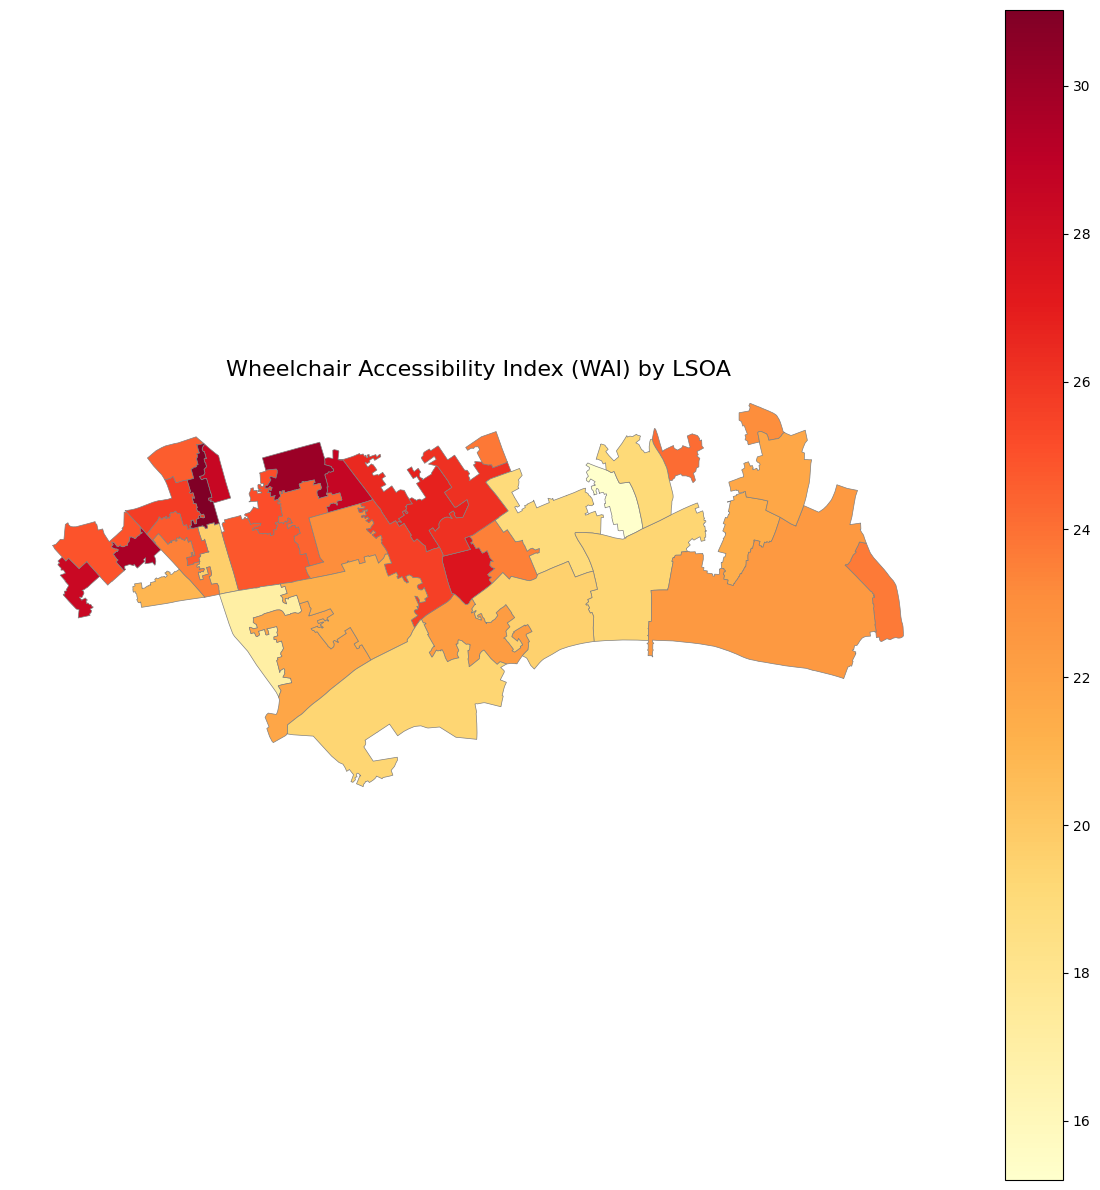

In [104]:
fig, ax = plt.subplots(figsize=(12, 12))

full_gdf.plot(
    column="WAI",
    cmap="YlOrRd",
    linewidth=0.5,
    edgecolor="gray",
    legend=True,
    ax=ax
)

ax.set_title("Wheelchair Accessibility Index (WAI) by LSOA", fontsize=16)
ax.axis("off")
plt.tight_layout()
plt.show()

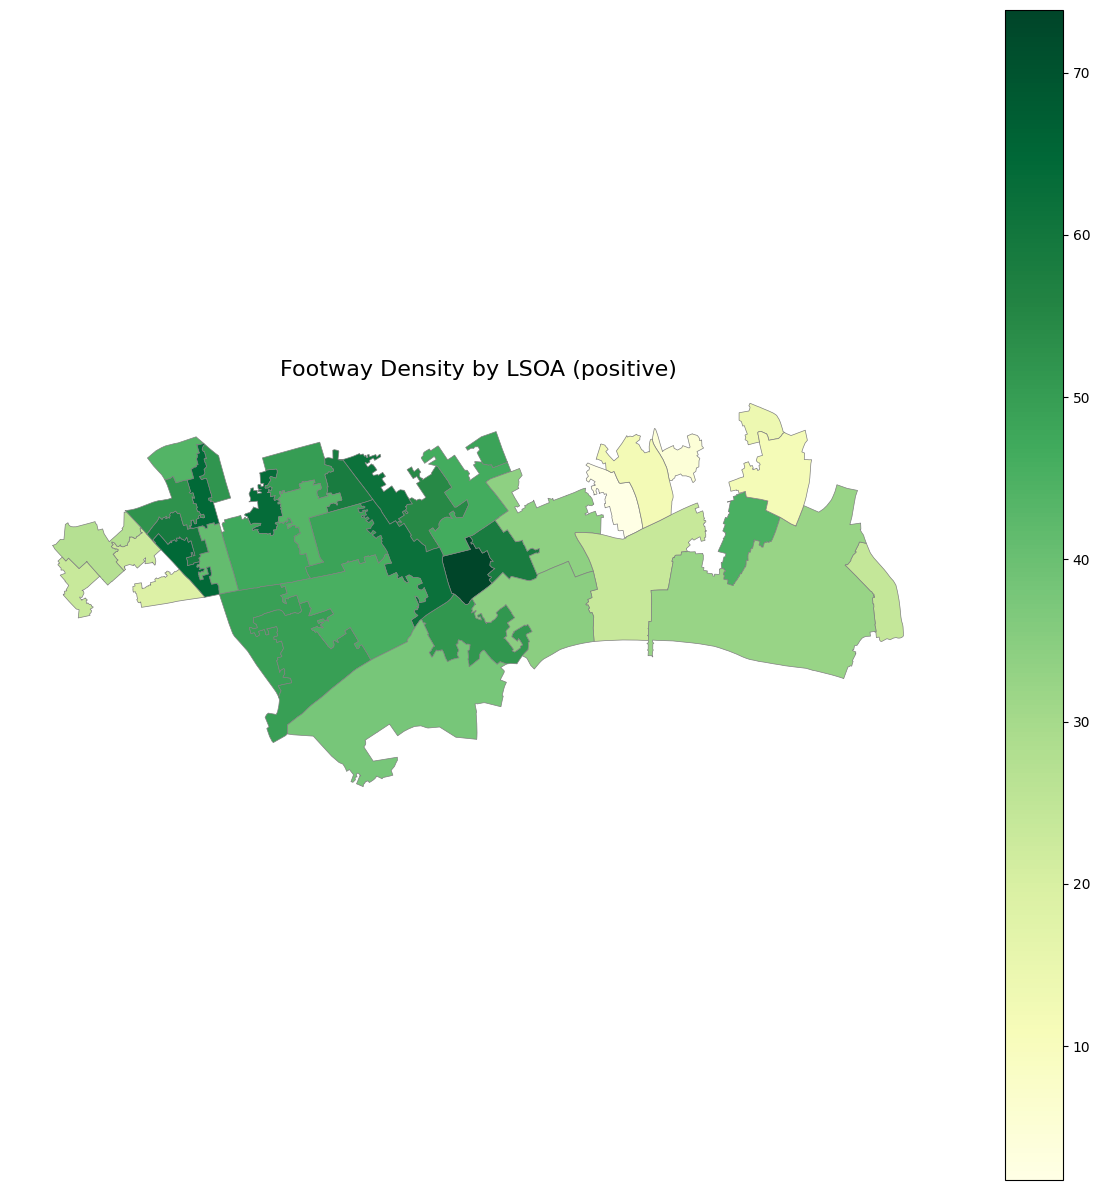

In [111]:
fig, ax = plt.subplots(figsize=(12, 12))
full_gdf.plot(
    column="footway_density",
    cmap="YlGn",
    linewidth=0.5,
    edgecolor="gray",
    legend=True,
    ax=ax
)
ax.set_title("Footway Density by LSOA (positive)", fontsize=16)
ax.axis("off")
plt.tight_layout()
plt.show()



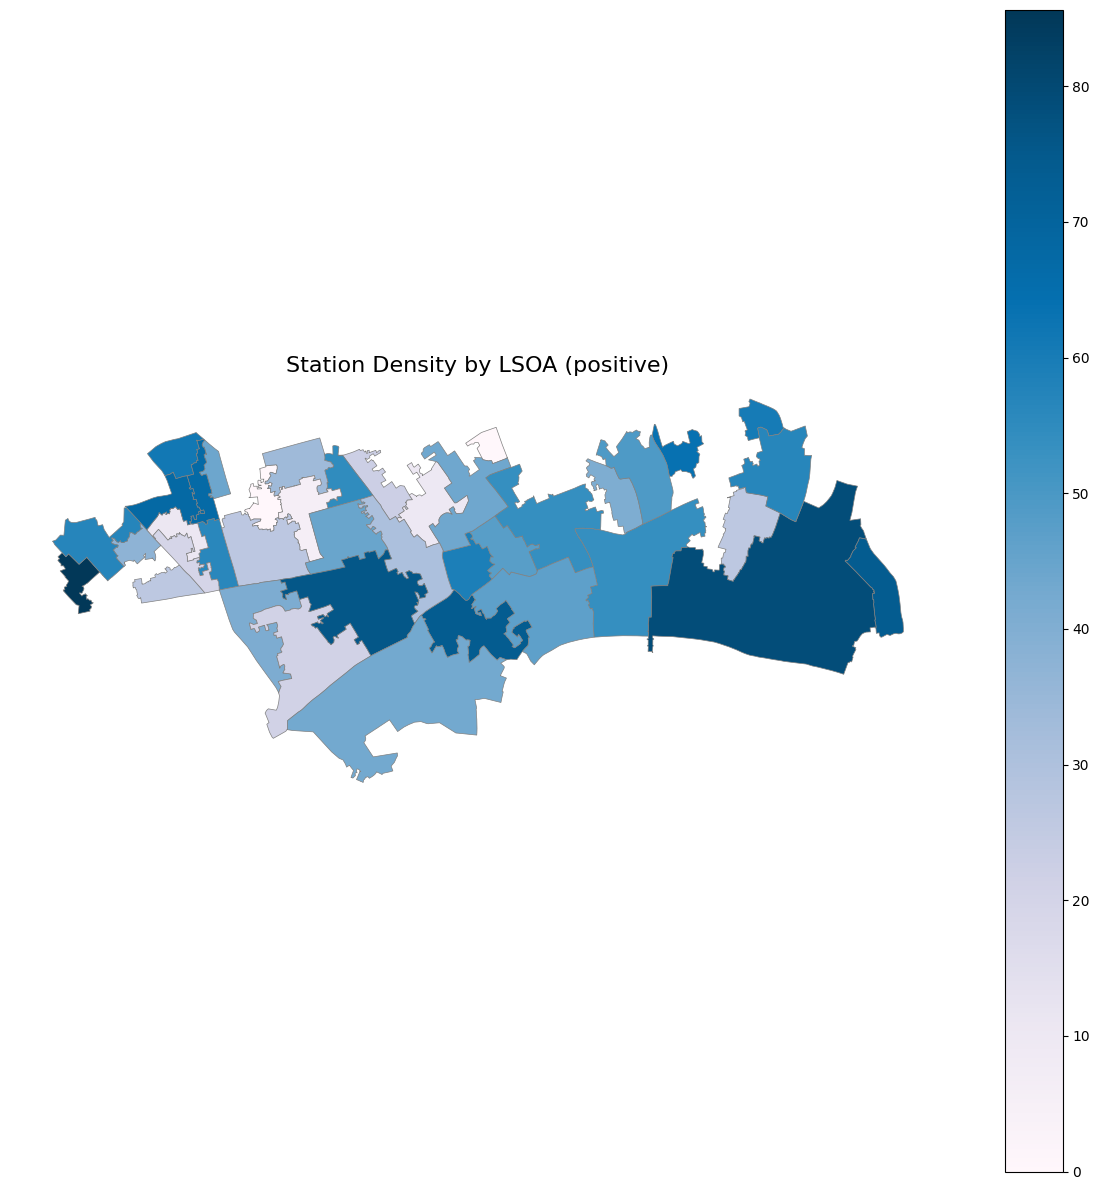

In [112]:
fig, ax = plt.subplots(figsize=(12, 12))
full_gdf.plot(
    column="station_density",
    cmap="PuBu",
    linewidth=0.5,
    edgecolor="gray",
    legend=True,
    ax=ax
)
ax.set_title("Station Density by LSOA (positive)", fontsize=16)
ax.axis("off")
plt.tight_layout()
plt.show()


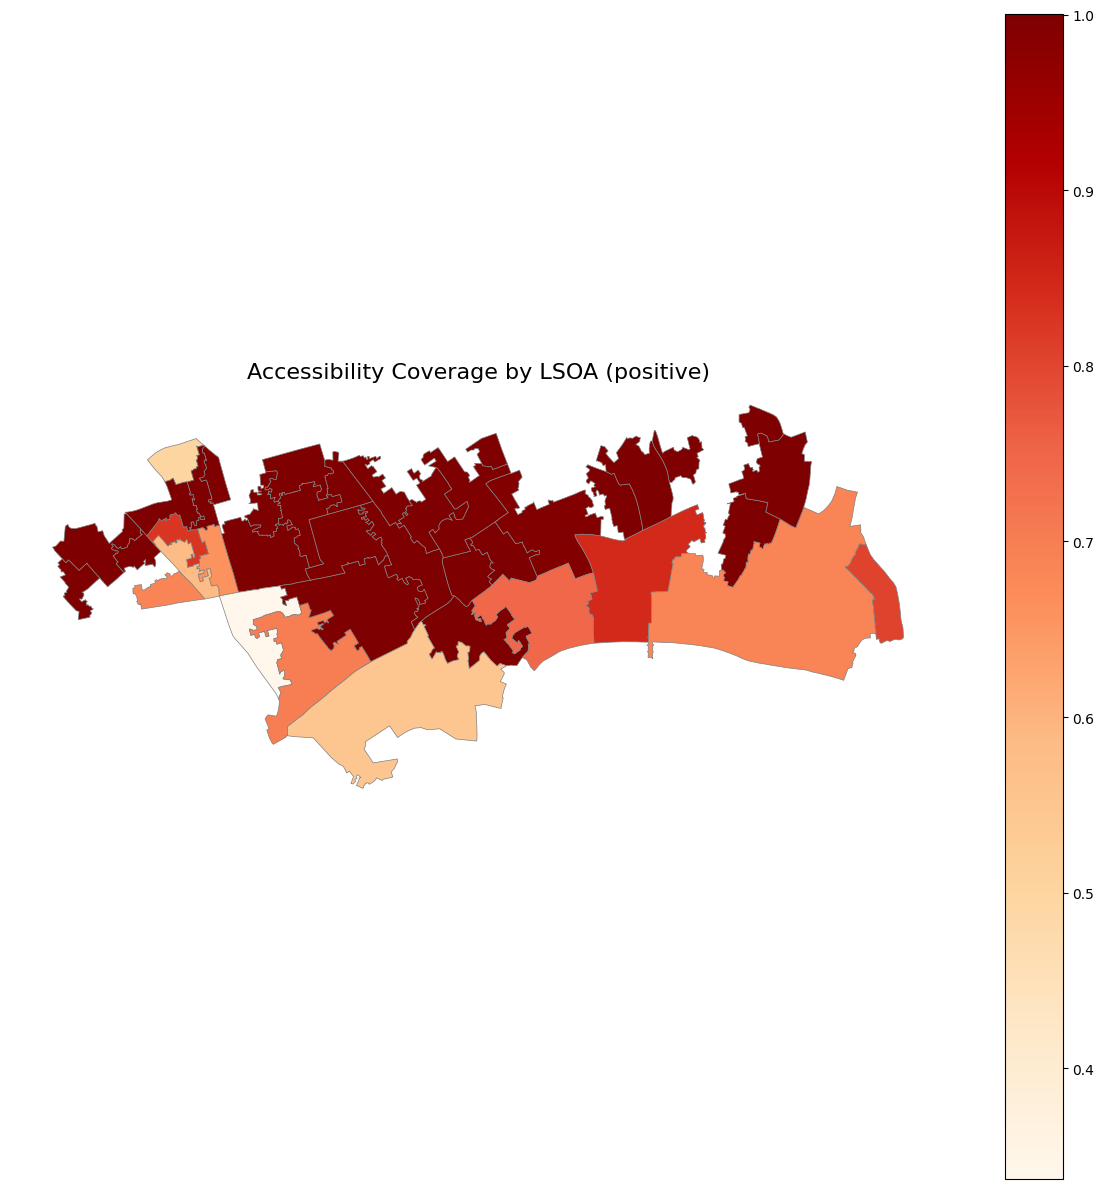

In [113]:
fig, ax = plt.subplots(figsize=(12, 12))
full_gdf.plot(
    column="accessibility_coverage",
    cmap="OrRd",
    linewidth=0.5,
    edgecolor="gray",
    legend=True,
    ax=ax
)
ax.set_title("Accessibility Coverage by LSOA (positive)", fontsize=16)
ax.axis("off")
plt.tight_layout()
plt.show()


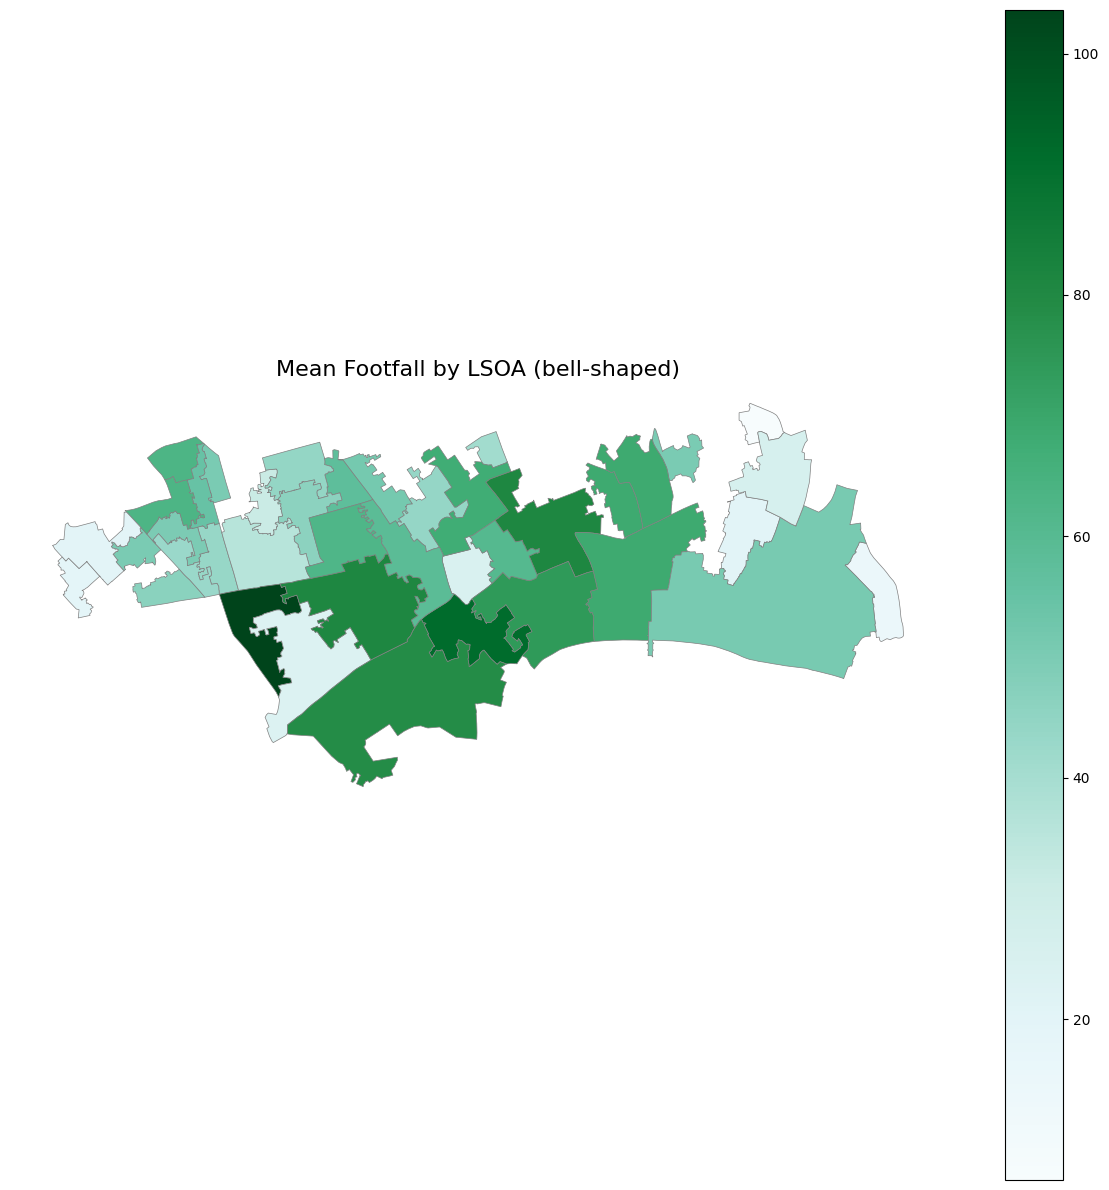

In [114]:
fig, ax = plt.subplots(figsize=(12, 12))
full_gdf.plot(
    column="mean_footfall",
    cmap="BuGn",
    linewidth=0.5,
    edgecolor="gray",
    legend=True,
    ax=ax
)
ax.set_title("Mean Footfall by LSOA (bell-shaped)", fontsize=16)
ax.axis("off")
plt.tight_layout()
plt.show()


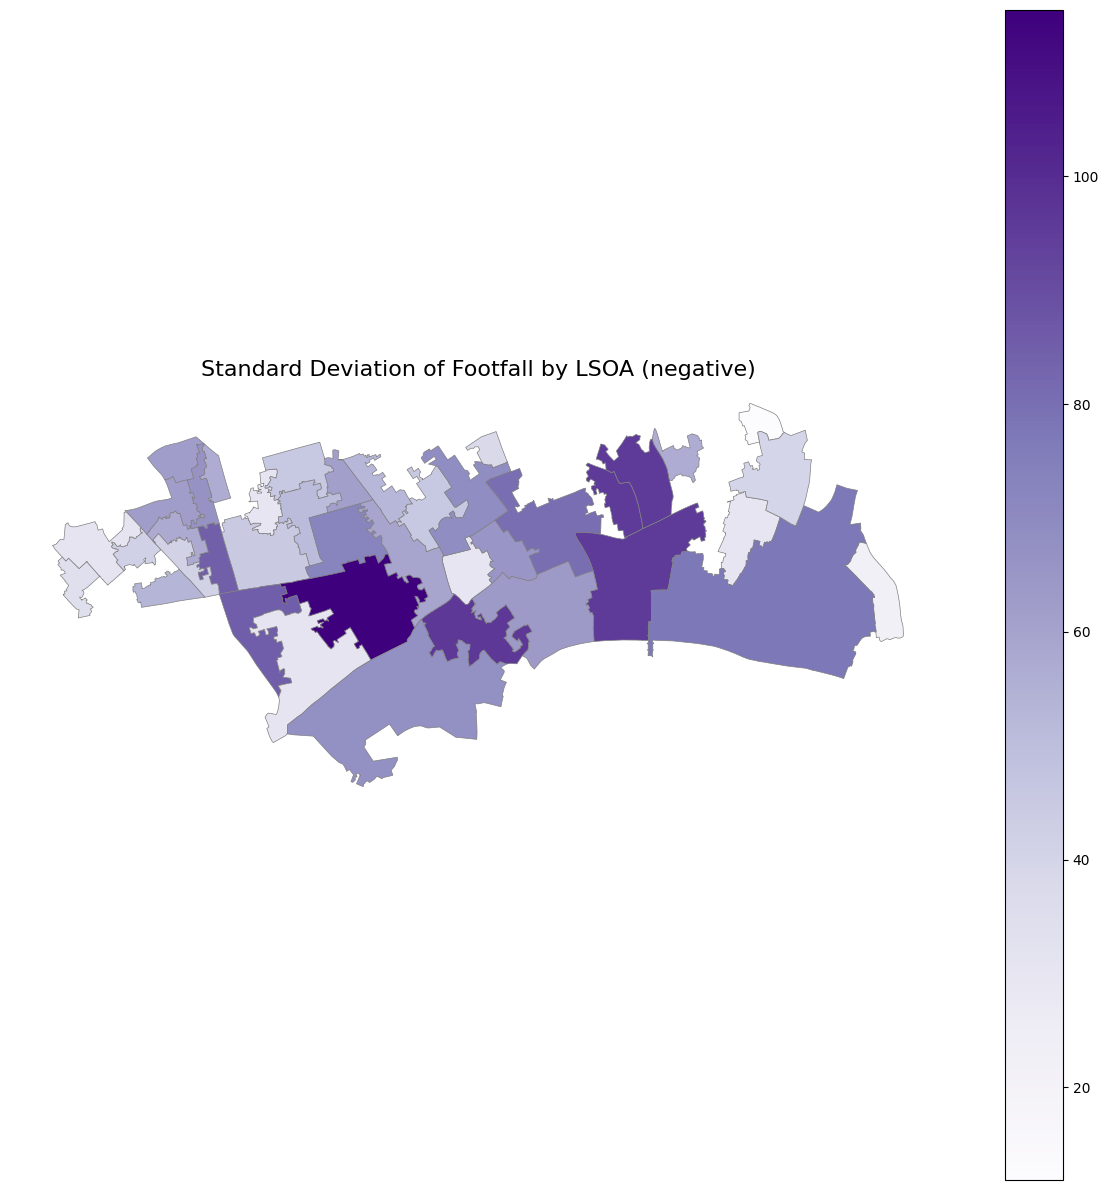

In [115]:
fig, ax = plt.subplots(figsize=(12, 12))
full_gdf.plot(
    column="std_footfall",
    cmap="Purples",
    linewidth=0.5,
    edgecolor="gray",
    legend=True,
    ax=ax
)
ax.set_title("Standard Deviation of Footfall by LSOA (negative)", fontsize=16)
ax.axis("off")
plt.tight_layout()
plt.show()


# Global Moran’s I

In [105]:
from esda.moran import Moran
from libpysal.weights import Queen

w = Queen.from_dataframe(full_gdf)
w.transform = 'r'

y = full_gdf["WAI"]

moran = Moran(y, w)

print(f"Moran's I = {moran.I:.4f}")
print(f"p-value = {moran.p_sim:.4f}")


Moran's I = 0.4818
p-value = 0.0010


/tmp/ipython-input-105-657821842.py:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(full_gdf)


# LISA

In [106]:
from esda.moran import Moran_Local
import numpy as np

y = full_gdf["WAI"].values
w.transform = 'r'

lisa = Moran_Local(y, w)

In [107]:
full_gdf["LISA_I"] = lisa.Is
full_gdf["LISA_p"] = lisa.p_sim
full_gdf["LISA_q"] = lisa.q
full_gdf["LISA_sig"] = lisa.p_sim < 0.05


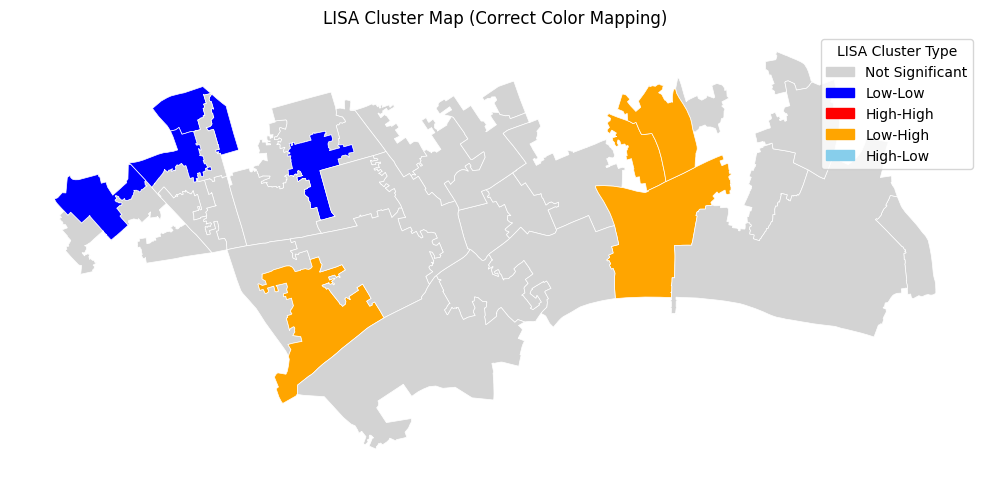

In [109]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

type_to_color = {
    0: "lightgrey",   # Not significant
    1: "blue",        # Low-Low
    2: "red",         # High-High
    3: "orange",      # Low-High
    4: "skyblue",     # High-Low
}

type_to_label = {
    0: "Not Significant",
    1: "Low-Low",
    2: "High-High",
    3: "Low-High",
    4: "High-Low"
}

full_gdf["LISA_color"] = full_gdf["LISA_type"].map(type_to_color)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
full_gdf.plot(color=full_gdf["LISA_color"], edgecolor="white", linewidth=0.5, ax=ax)

patches = [mpatches.Patch(color=color, label=label)
           for val, color in type_to_color.items()
           for label in [type_to_label[val]]]
ax.legend(handles=patches, title="LISA Cluster Type")

ax.set_title("LISA Cluster Map (Correct Color Mapping)")
ax.axis("off")
plt.tight_layout()
plt.show()
